Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,
                                                               image_size=(img_height,img_width),
                                                               seed=123,
                                                               validation_split=0.2,
                                                               subset="training")

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,
                                                               image_size=(img_height,img_width),
                                                               seed=123,
                                                               validation_split=0.2,
                                                               subset="validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

0 vascular lesion
1 nevus
2 pigmented benign keratosis
3 melanoma
4 dermatofibroma
5 actinic keratosis
6 basal cell carcinoma
7 squamous cell carcinoma
8 seborrheic keratosis


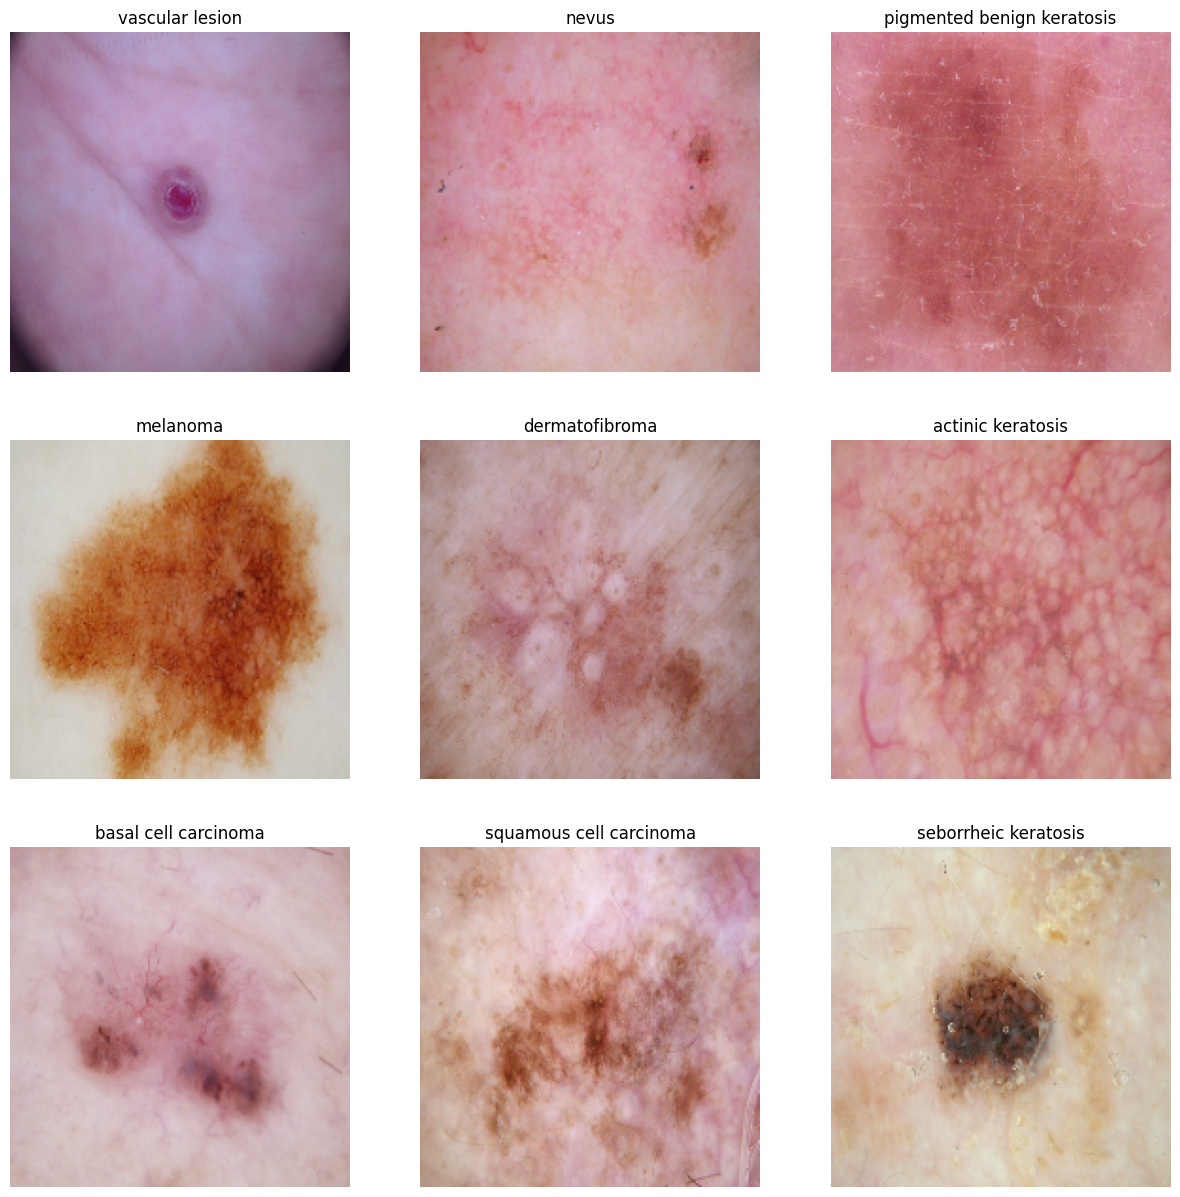

In [11]:
import matplotlib.pyplot as plt
cn=[]
plt.figure(figsize=(15,15))
j=0
for img,labels in train_ds:
    for i in range(32):
        if class_names[labels[i]] not in cn:
            l = class_names[labels[i]]
            cn.append(l)
            ax = plt.subplot(3, 3, j + 1)
            plt.imshow(img[i].numpy().astype("uint8"))
            plt.title(l)
            plt.axis("off")
            print(j,cn[j])
            j=j+1
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
num_classes = 9
model = Sequential(
[layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(128,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64,3,padding='same',activation='relu'),
layers.Flatten(),
layers.Dense(500,activation='relu'),
layers.Dense(32,activation='relu'),
layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

"Adam" is chosen as Optimizer <br>
"Accuracy" is chosen as Metrics for evaluation

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 11s 66ms/step - loss: 2.0869 - accuracy: 0.1830 - val_loss: 2.0993 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 2s 44ms/step - loss: 1.9906 - accuracy: 0.2506 - val_loss: 1.9904 - val_accuracy: 0.2506
Epoch 3/20
56/56 [==============================] - 2s 43ms/step - loss: 1.8854 - accuracy: 0.2896 - val_loss: 1.7455 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 2s 43ms/step - loss: 1.7879 - accuracy: 0.3555 - val_loss: 1.6809 - val_accuracy: 0.4004
Epoch 5/20
56/56 [==============================] - 2s 43ms/step - loss: 1.6649 - accuracy: 0.3890 - val_loss: 1.6995 - val_accuracy: 0.4116
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 1.6482 - accuracy: 0.4012 - val_loss: 1.6630 - val_accuracy: 0.4183
Epoch 7/20
56/56 [==============================] - 2s 43ms/step - loss: 1.5811 - accuracy: 0.4241 - val_loss: 1.5544 - val_accuracy: 0.4295
Epoch 8/20
5

### Visualizing training results

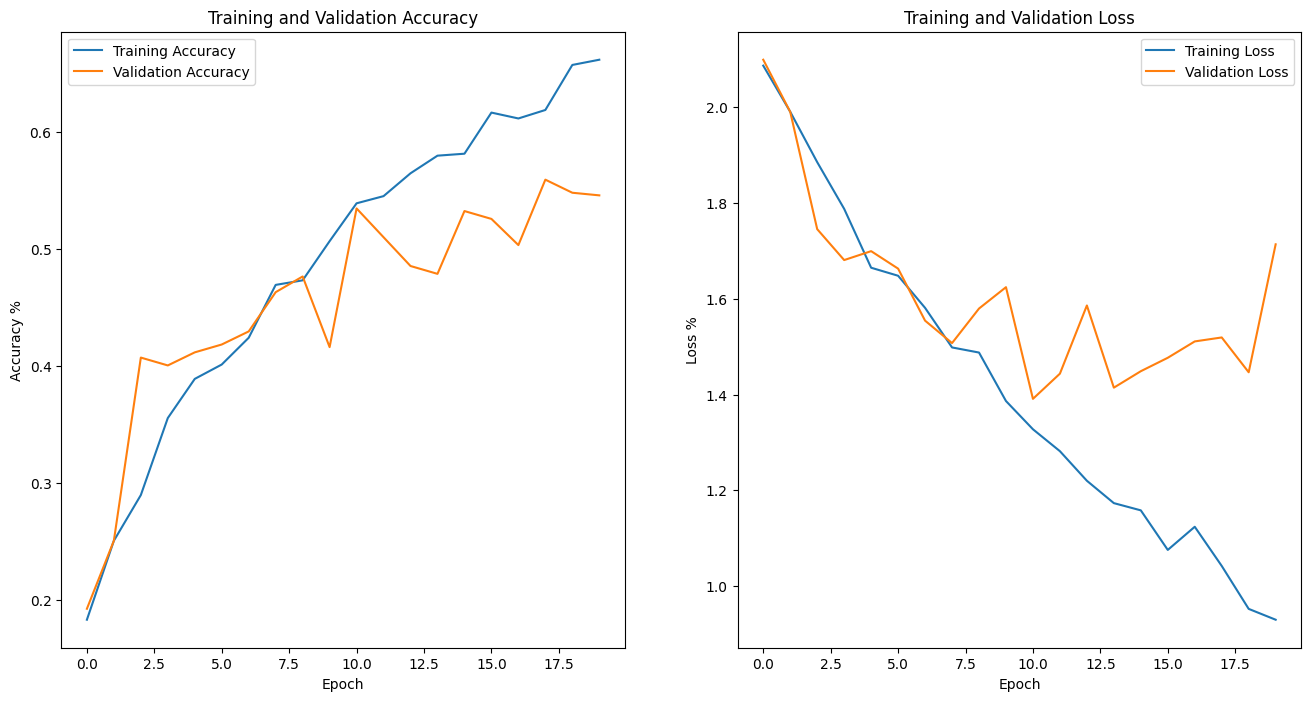

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Loss %')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

From the plot we can clearly see that there exist <b>over-fitting</b>, Since the accuracy is 66% and validation accuracy is 54%. <br>
Apart from that there is also low accuracy exist, meaning the Model randomly classifies the image as cancer or not but this in realistic case is not a good option.<br><br>

The Reason for the above issues might be due to the following,
<ul>
    <li>There is very less samples to train as well as to validate.</li>
    <li>Model is not generalized, but it has memorized the values.</li>
    <li>It might have learnt from noise in the dataset as well.</li>
</ul>
<br>
To avoid the above things we can use <b>Augmentation Techniques</b> and try to expose the model to more number of images and it might generalize the model learning.

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

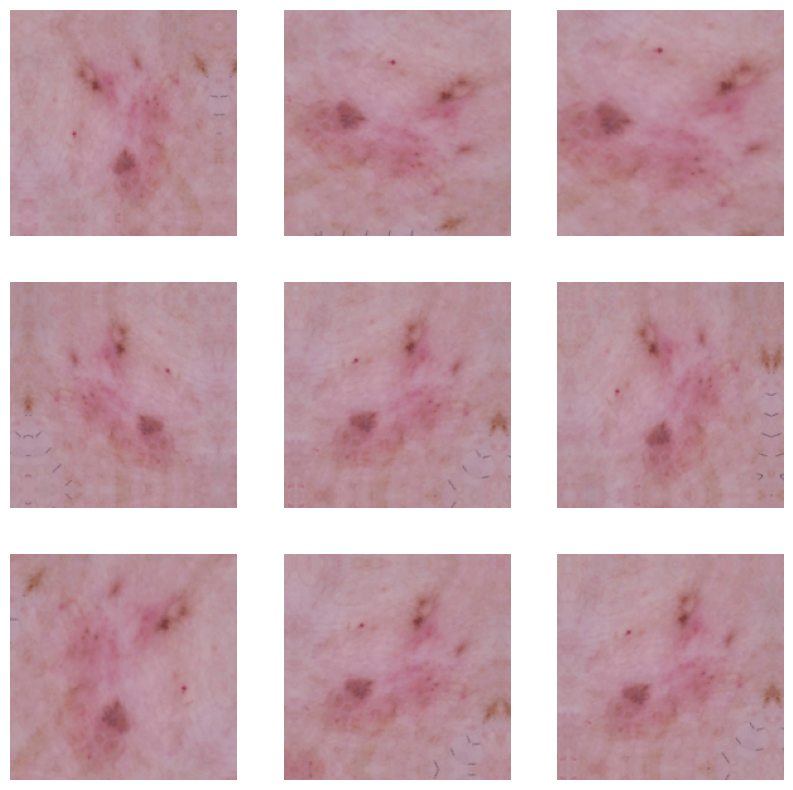

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model_aug = Sequential([
data_augmentation,
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(128,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.2),
layers.Flatten(),
layers.Dense(1000,activation='relu'),
layers.Dense(32,activation='relu'),
layers.Dense(num_classes)
])

### Compiling the model

In [21]:
## Your code goes here
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_aug.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
history = model_aug.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 21s 316ms/step - loss: 1.8720 - accuracy: 0.3069 - val_loss: 1.7150 - val_accuracy: 0.3915
Epoch 2/20
56/56 [==============================] - 18s 321ms/step - loss: 1.6664 - accuracy: 0.3962 - val_loss: 1.6618 - val_accuracy: 0.3982
Epoch 3/20
56/56 [==============================] - 18s 319ms/step - loss: 1.5368 - accuracy: 0.4498 - val_loss: 1.5687 - val_accuracy: 0.4765
Epoch 4/20
56/56 [==============================] - 18s 316ms/step - loss: 1.4690 - accuracy: 0.4844 - val_loss: 1.4745 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 18s 317ms/step - loss: 1.4322 - accuracy: 0.4922 - val_loss: 1.4647 - val_accuracy: 0.4810
Epoch 6/20
56/56 [==============================] - 18s 318ms/step - loss: 1.3899 - accuracy: 0.5078 - val_loss: 1.5484 - val_accuracy: 0.4676
Epoch 7/20
56/56 [==============================] - 18s 318ms/step - loss: 1.4219 - accuracy: 0.4927 - val_loss: 1.4142 - val_accuracy: 0.5034

### Visualizing the results

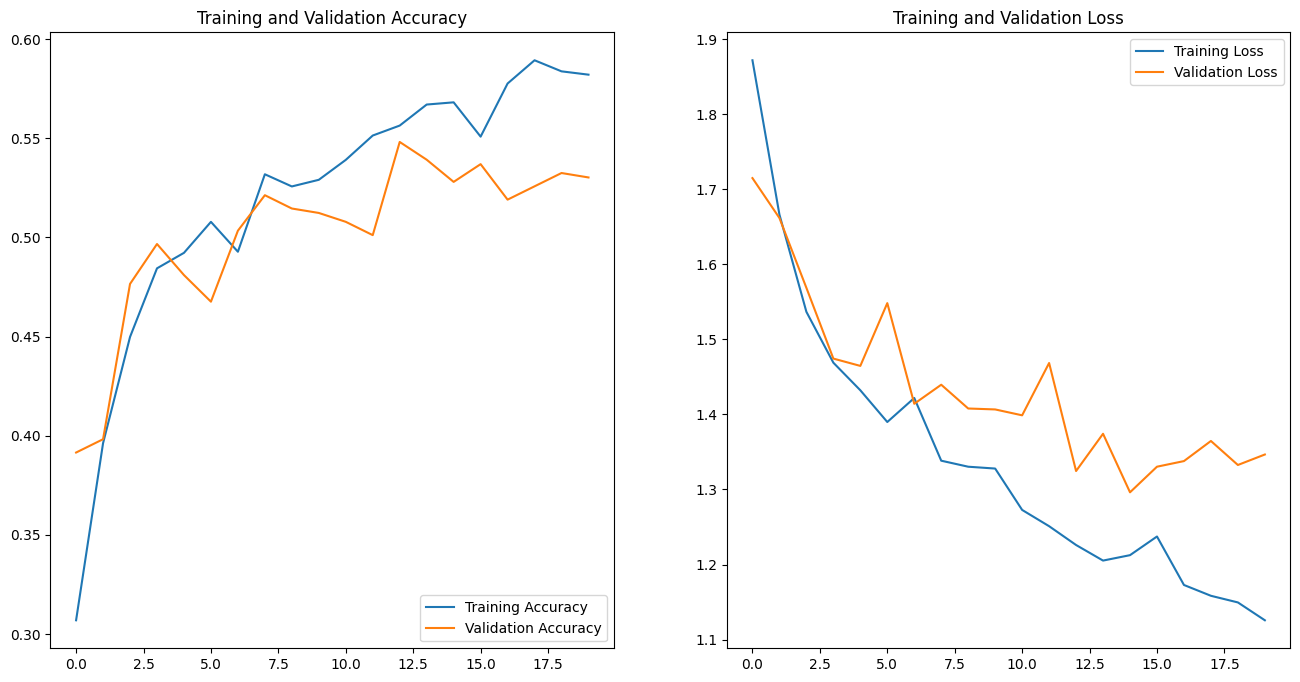

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

From the plot we could observe that the effect of Overfitting has been <b>reduced</b> to a good extent due to applying Augmentation. <br>
<b>The Accuracy is 58% and Validation Accuracy is 53%. </b><br><br>

So there is definetly some improvement over the earlier model, but still model can still be improvised even to produce high accuracy with good validation accuracy.<br><br>

This can be done by 
<ol>
    <li>Increasing the number of epochs</li>
    <li>Applying multiple Augmentation techniques like rotation, flipping, Zooming.</li>
    <li>Rectifying the class imbalance using the Augmentator Pipeline.</li>
</ol>

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.
lst=[]
for i in range(9):
    a = class_names[i] + '/*'
    cnt = len(list(data_dir_train.glob(a)))/image_count_train
    lst.append([class_names[i], cnt*100])
df = pd.DataFrame(lst,columns=['Class_Names','Count_in_%']).sort_values(by='Count_in_%',axis=0,ascending=False)

In [25]:
df

Class_Names  Count_in_%
5  pigmented benign keratosis   20.634212
3                    melanoma   19.562305
1        basal cell carcinoma   16.793211
4                       nevus   15.944618
7     squamous cell carcinoma    8.083966
8             vascular lesion    6.208129
0           actinic keratosis    5.091559
2              dermatofibroma    4.242966
6        seborrheic keratosis    3.439035

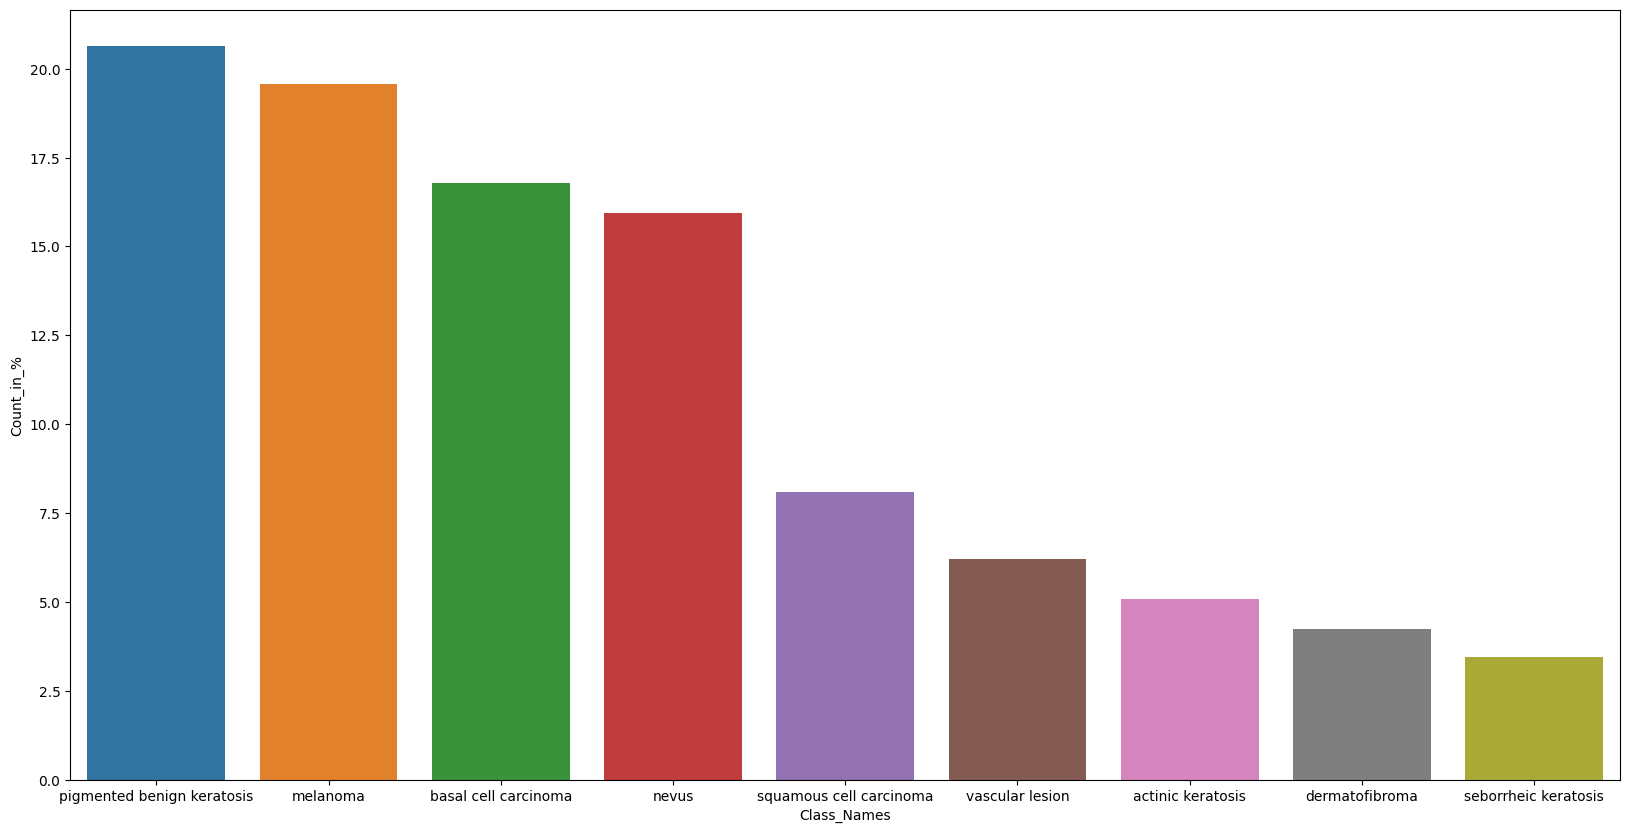

In [26]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(x=df.Class_Names,y=df['Count_in_%'])
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

Ans - seborrheic keratosis has only ~3.4% of samples i.e 77 samples in the train set
#### - Which classes dominate the data in terms proportionate number of samples?
Ans - pigmented benign keratosis has 20.4% percentage of sample i.e. 462 samples in the train set

In [27]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025825.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025953.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025957.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025992.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0026040.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0026149.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0026171.jpg',
 'Skin can

In [28]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [29]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [30]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df

Path              Label
0     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
1     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
2     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
3     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
4     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
...                                                 ...                ...
2234  Skin cancer ISIC The International Skin Imagin...    vascular lesion
2235  Skin cancer ISIC The International Skin Imagin...    vascular lesion
2236  Skin cancer ISIC The International Skin Imagin...    vascular lesion
2237  Skin cancer ISIC The International Skin Imagin...    vascular lesion
2238  Skin cancer ISIC The International Skin Imagin...    vascular lesion

[2239 rows x 2 columns]

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
path_to_training_dataset=r'S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(750) ## We are adding 750 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F970C304C0>: 100%|█| 750/750 [00:03<00:


Initialised with 376 image(s) found.
Output directory set to S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F970C5FD00>: 100%|█| 750/750 [00:03<00:00, 227.17 Samples


Initialised with 95 image(s) found.
Output directory set to S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F9177FBE80>: 100%|█| 750/750 [00:03<00:00, 245.09 Samples


Initialised with 438 image(s) found.
Output directory set to S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1F8E7FD77C0>: 100%|█| 750/750 [00:11<00:00, 63.72 Samples


Initialised with 357 image(s) found.
Output directory set to S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x1F849CCA5B0>: 100%|█| 750/750 [00:11<00:00, 65.72 Samples/


Initialised with 462 image(s) found.
Output directory set to S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F913386BB0>: 100%|█| 750/750 [00:03<00:00, 237.23 Samples


Initialised with 77 image(s) found.
Output directory set to S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1F966A1D970>: 100%|█| 750/750 [00:05<00:00, 127.86 Sample


Initialised with 181 image(s) found.
Output directory set to S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F93DA3B880>: 100%|█| 750/750 [00:03<00:00, 234.12 Samples


Initialised with 139 image(s) found.
Output directory set to S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F8E7FD7160>: 100%|█| 750/750 [00:03<00:00, 197.34 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [33]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6750


### Lets see the distribution of augmented data after adding new images to the original training data.

In [34]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_459eb63f-9c25-4a5c-b209-c2a8fa31c6bc.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6eabf0a9-dcfd-4dc8-a866-984d58380857.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6f7a1e1e-9699-4be6-a12c-2ed38be6d510.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_d5e89dc4-202b-401c-9ada-ca38abca5658.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_06f53e3a-d85f-4211-878d-f7a10e3830cb.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train

In [35]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [36]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [37]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\sthul\AppData\Local\Temp\ipykernel_14408\390629722.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [38]:
new_df['Label'].value_counts()

pigmented benign keratosis    1212
melanoma                      1188
basal cell carcinoma          1126
nevus                         1107
squamous cell carcinoma        931
vascular lesion                889
actinic keratosis              864
dermatofibroma                 845
seborrheic keratosis           827
Name: Label, dtype: int64

In [39]:
df2['Label'].value_counts()

actinic keratosis             750
basal cell carcinoma          750
dermatofibroma                750
melanoma                      750
nevus                         750
pigmented benign keratosis    750
seborrheic keratosis          750
squamous cell carcinoma       750
vascular lesion               750
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [40]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [41]:
data_dir_train=r'S:/PG DS/Deep learning/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8989 files belonging to 9 classes.
Using 7192 files for training.


#### **Todo:** Create a validation dataset

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8989 files belonging to 9 classes.
Using 1797 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [43]:
## your code goes here
num_classes = 9

model_final = Sequential([
data_augmentation,
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(128,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.2),
layers.Flatten(),
layers.Dense(1000,activation='relu'),
layers.Dense(32,activation='relu'),
layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [44]:
## your code goes here
model_final.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_final.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

#### **Todo:**  Train your model

In [45]:
epochs = 30
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
225/225 [==============================] - 87s 367ms/step - loss: 1.7855 - accuracy: 0.3122 - val_loss: 1.6721 - val_accuracy: 0.3784
Epoch 2/30
225/225 [==============================] - 80s 353ms/step - loss: 1.4958 - accuracy: 0.4185 - val_loss: 1.4247 - val_accuracy: 0.4630
Epoch 3/30
225/225 [==============================] - 81s 357ms/step - loss: 1.4012 - accuracy: 0.4543 - val_loss: 1.3772 - val_accuracy: 0.4825
Epoch 4/30
225/225 [==============================] - 83s 367ms/step - loss: 1.2976 - accuracy: 0.4989 - val_loss: 1.2978 - val_accuracy: 0.5192
Epoch 5/30
225/225 [==============================] - 82s 363ms/step - loss: 1.2574 - accuracy: 0.5122 - val_loss: 1.1743 - val_accuracy: 0.5704
Epoch 6/30
225/225 [==============================] - 83s 367ms/step - loss: 1.1924 - accuracy: 0.5323 - val_loss: 1.1158 - val_accuracy: 0.5826
Epoch 7/30
225/225 [==============================] - 83s 369ms/step - loss: 1.1446 - accuracy: 0.5580 - val_loss: 1.1500 - val_ac

#### **Todo:**  Visualize the model results

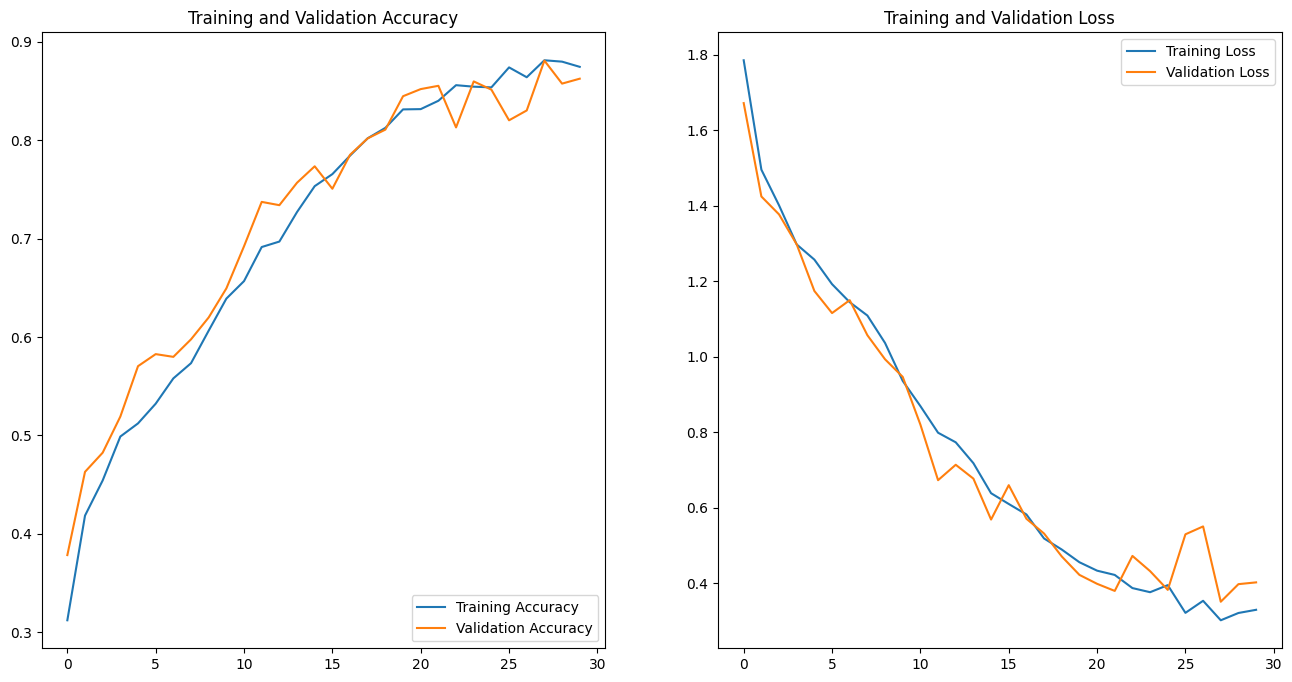

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



From the observations we could see that the <b> Accuracy is 87.4% and Validation Accuracy us 86.2%</b><br>
The balancing of each class using Augmentor has helped to improve the performance of the model drastically. We can see from the plot that both training and validation accuracy increases steadily.We can also infer that Augmentation also helped to control the initial over-fitting issue.<br><br>
Hence from this we could nearly confirm the techniques applied has worked to a good extent. But we cant trust until this is tested on unseen data.<br>

Hence we can use the Test data which is unseen to see how the predictions are.

In [47]:
#using the test data

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test, labels='inferred', 
    label_mode='int', image_size=(img_height,img_width), 
    shuffle=False, seed=123, )

Found 118 files belonging to 9 classes.


0 actinic keratosis
1 basal cell carcinoma
2 dermatofibroma
3 melanoma
4 nevus
5 pigmented benign keratosis
6 seborrheic keratosis
7 squamous cell carcinoma
8 vascular lesion


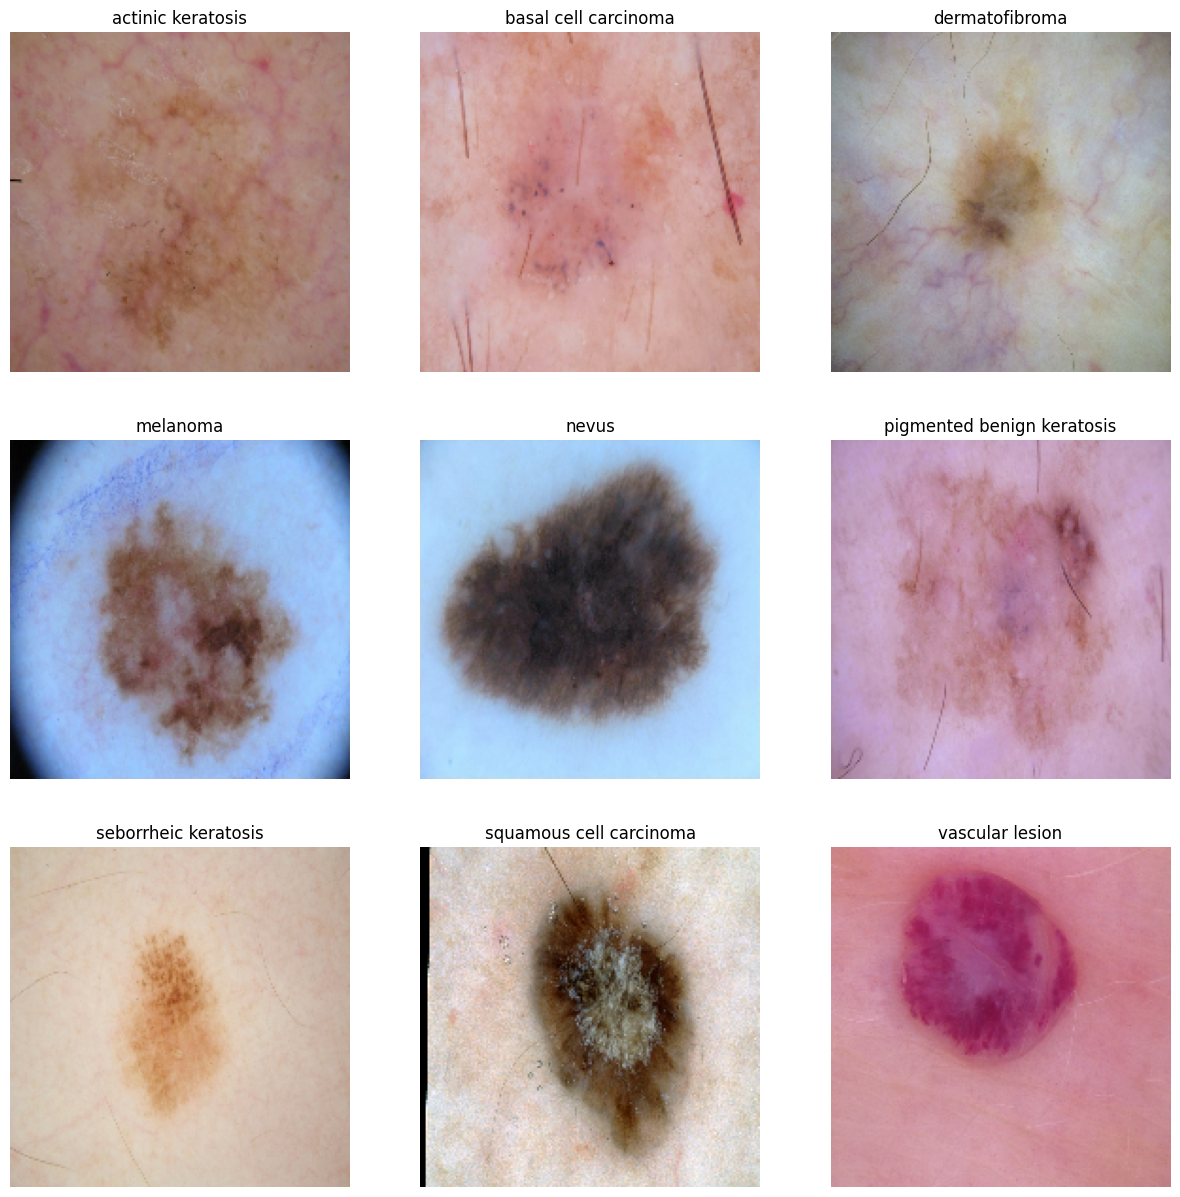

In [65]:
cn=[]
plt.figure(figsize=(15,15))
j=0
for img,labels in test_ds:
    for i in range(20):
        if class_names[labels[i]] not in cn:
            l = class_names[labels[i]]
            cn.append(l)
            ax = plt.subplot(3, 3, j + 1)
            plt.imshow(img[i].numpy().astype("uint8"))
            plt.title(l)
            plt.axis("off")
            print(j,cn[j])
            j=j+1

In [98]:
# Model Evaluation

img_path = 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024409.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model_final.predict(img_array)

print('\nPredictions score ',predictions)


print("\nPrediction says the Cancer type belongs to class {} with a {:.3f} prediction score."
    .format(class_names[np.argmax(score)], max(predictions[0])))


1/1 [==============================] - 0s 44ms/step

Predictions score  [[ 8.184925   11.147904    0.50986755  4.7193575   9.313144   21.024864
  -7.797236    3.6796124  -6.1069813 ]]

Prediction says the Cancer type belongs to class pigmented benign keratosis with a 21.025 prediction score.


#### From the above we could see that the prediction seems to be correct and we could say that the model has perfomred decently well, looking at the probability score other classes have got.